<a href="https://colab.research.google.com/github/zarrar1607/hello-world/blob/master/Coursera_TensorFlow_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
import pandas as pd

In [ ]:
import tensorflow.keras

In [ ]:
fashion_minst = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_minst.load_data()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
tf.unique(train_labels)

Unique(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 1, ..., 2, 1, 5], dtype=int32)>)

In [ ]:
y, idx, count = tf.unique_with_counts(train_labels)
print(y)
print(count)

tf.Tensor([9 0 3 2 7 5 1 6 4 8], shape=(10,), dtype=uint8)
tf.Tensor([6000 6000 6000 6000 6000 6000 6000 6000 6000 6000], shape=(10,), dtype=int32)


#Normalizing the data
On dividing by 255 
The reamining data will be in between 0s and 1s
Neural network works better with normalized data

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

1. **keras.layers.Flatten:** A flatten operation on a tensor reshapes the tensor to have the shape that is equal to the number of elements contained in tensor non including the batch dimension.

  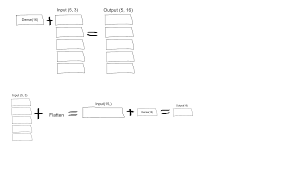
2. **tf.nn:** Primitive Neural Net (NN) Operations.
3.**tf.nn.relu:** Relu activation function in keras and why is it used The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x it returns that value back.
3. **tf.nn.softmax:** Relu activation function in keras and why is it used The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x it returns that value back. Softmax is often used as the activation for the last layer of a classification network.  

In [ ]:
model = keras.Sequential([   
  keras.layers.Flatten(input_shape = (28,28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy')
model.fit(train_images,train_labels,epochs=50)

In [ ]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 28us/step


0.5199930697858334

# Callback Function
A callback function is a function passed into another function as an argument, which is then invoked inside the outer function to complete some kind of routine or action.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss is low ==> Cancelling Training!!")
      self.model.stop_training = True
# myCallback: Stop training when losses are less 0.4

In [ ]:
callbacks = myCallback()
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy')
model.fit(train_images,train_labels,epochs = 5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0877

Loss is low ==> Cancelling Training!!


In [ ]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 24us/step


0.5506919248998166

In [ ]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc')>0.99):
                print('\nReached 99% accuracy so cancelling training!')
                self.model.stop_training = True
    callbacks = myCallback()
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # YOUR CODE SHOULD START HERE
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(1024,activation = tf.nn.relu),
        tf.keras.layers.Dense(514,activation = tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE SHOULD START HERE
        x_train,y_train,epochs = 10,callbacks = [callbacks]
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]

In [ ]:
train_mnist()

NameError: ignored